In [210]:
 #installing pandas-datareader (allows us to read stock information directly from the internet)
!pip install pandas-datareader

In [212]:
#importing the necessary libraries and modules
from pandas_datareader import data,wb
import pandas as pd
import datetime
import numpy as np
%matplotlib inline

In [214]:
#setting the time period
start = datetime.datetime(2006,1,1)
end = datetime.datetime(2016,1,1)

In [166]:
#We will be looking at 3 banks. Using stooq index data.

#CitiGroup
C = data.DataReader('C', 'stooq', start, end)
C = C[::-1] #reversed the dataset as stooq index dataset was originally inverted
#GoldmanSachs
GS = data.DataReader('GS','stooq',start,end)
GS = GS[::-1]
#JPMorganChase
JPM = data.DataReader('JPM','stooq',start,end)
JPM = JPM[::-1]

In [218]:
#created labels
tickers = ['C','GS','JPM']

In [220]:
bank_stocks = pd.concat([C,GS,JPM], axis = 1,keys = tickers)

In [222]:
bank_stocks.head()

C                                                GS  \
               Open     High      Low    Close        Volume     Open   
Date                                                                    
2006-01-03  405.492  408.615  398.112  407.891  1.858097e+06  104.109   
2006-01-04  404.358  406.325  400.089  400.354  2.260921e+06  104.609   
2006-01-05  400.843  403.663  400.520  402.321  1.371893e+06  103.531   
2006-01-06  404.504  404.641  398.865  402.321  1.655812e+06  104.579   
2006-01-09  402.174  403.329  399.678  400.432  2.031072e+06  105.560   

                                                         JPM           \
               High      Low    Close        Volume     Open     High   
Date                                                                    
2006-01-03  106.354  102.071  105.883  7.508235e+06  28.7148  29.0970   
2006-01-04  105.922  103.865  104.432  5.917173e+06  28.6824  28.9428   
2006-01-05  104.599  103.198  104.394  4.521468e+06  28.5556  28.7030   
2006-01-06  106.187  104.579  105.855  5.257604e+06  28.7846  29.0125   
2006-01-09  107.323  105.158  107.128  5.749209e+06  28.7522  29.3593   

                                            
                Low    Close        Volume  
Date                                        
2006-01-03  28.3376  28.9771  1.780695e+07  
2006-01-04  28.4201  28.5626  1.871252e+07  
2006-01-05  28.4810  28.6520  1.118271e+07  
2006-01-06  28.5164  28.8543  1.104151e+07  
2006-01-09  28.7522  29.3229  2.298942e+07

In [224]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [226]:
bank_stocks.head()

Bank Ticker        C                                                GS  \
Stock Info      Open     High      Low    Close        Volume     Open   
Date                                                                     
2006-01-03   405.492  408.615  398.112  407.891  1.858097e+06  104.109   
2006-01-04   404.358  406.325  400.089  400.354  2.260921e+06  104.609   
2006-01-05   400.843  403.663  400.520  402.321  1.371893e+06  103.531   
2006-01-06   404.504  404.641  398.865  402.321  1.655812e+06  104.579   
2006-01-09   402.174  403.329  399.678  400.432  2.031072e+06  105.560   

Bank Ticker                                               JPM           \
Stock Info      High      Low    Close        Volume     Open     High   
Date                                                                     
2006-01-03   106.354  102.071  105.883  7.508235e+06  28.7148  29.0970   
2006-01-04   105.922  103.865  104.432  5.917173e+06  28.6824  28.9428   
2006-01-05   104.599  103.198  104.394  4.521468e+06  28.5556  28.7030   
2006-01-06   106.187  104.579  105.855  5.257604e+06  28.7846  29.0125   
2006-01-09   107.323  105.158  107.128  5.749209e+06  28.7522  29.3593   

Bank Ticker                                  
Stock Info       Low    Close        Volume  
Date                                         
2006-01-03   28.3376  28.9771  1.780695e+07  
2006-01-04   28.4201  28.5626  1.871252e+07  
2006-01-05   28.4810  28.6520  1.118271e+07  
2006-01-06   28.5164  28.8543  1.104151e+07  
2006-01-09   28.7522  29.3229  2.298942e+07

In [228]:
#finding out max closing price in the time period
for tick in tickers:
    print(tick,bank_stocks[tick]['Close'].max())

C 466.812
GS 203.691
JPM 57.1634


In [230]:
#created an empty dataframe to store returns
returns = pd.DataFrame()

In [232]:
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()
returns.head()

,C Return,GS Return,JPM Return
Date,,,
2006-01-03,NaN,NaN,NaN
2006-01-04,-0.018478,-0.013704,-0.014304
2006-01-05,0.004913,-0.000364,0.003130
2006-01-06,0.000000,0.013995,0.007061
2006-01-09,-0.004695,0.012026,0.016240


C:\Users\bijit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\bijit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\bijit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


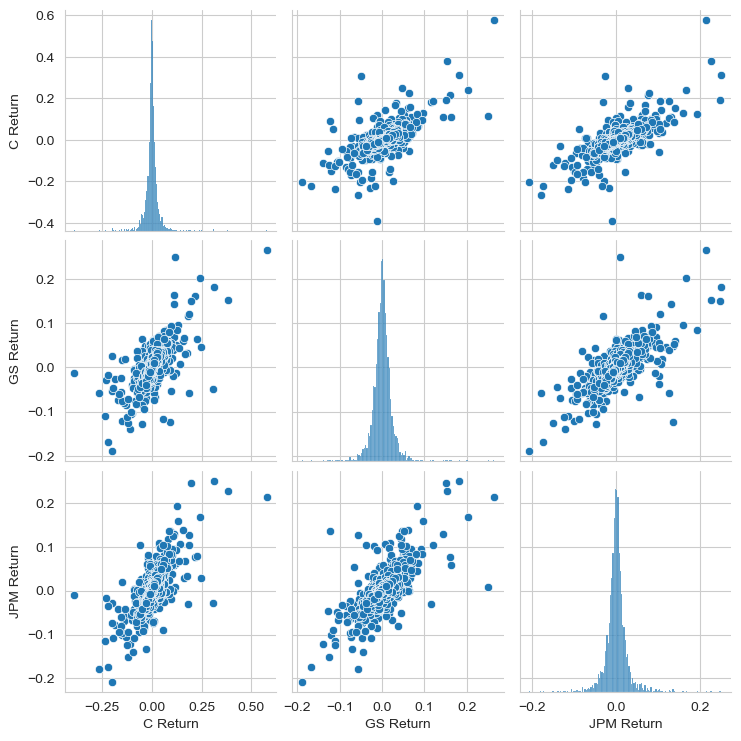

In [236]:
import seaborn as sns
sns.pairplot(returns[1:])

# SEE THE VARIATION IN THE C RETURN PLOTS

In [238]:
#worst drop
returns.idxmin()

C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
dtype: datetime64[ns]

In [240]:
#best single day gain
returns.idxmax()

C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
dtype: datetime64[ns]

In [246]:
#as standard deviation of CitiGroup is highest, most risky
returns.std()

C Return      0.038615
GS Return     0.025371
JPM Return    0.027670
dtype: float64

In [248]:
#standard deviations of year 2015
returns.iloc[1985:2351].std()

C Return      0.012954
GS Return     0.011281
JPM Return    0.011690
dtype: float64

C:\Users\bijit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


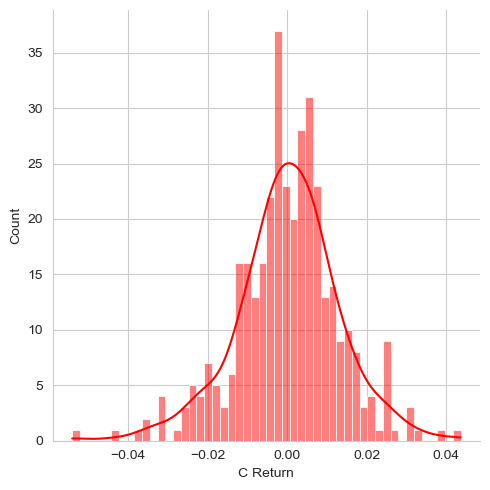

In [250]:
#plot of C returns for the year 2015
sns.displot(returns.iloc[1985:2351]['C Return'],color = 'red',bins = 50,alpha = 0.5,kde=True)

C:\Users\bijit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


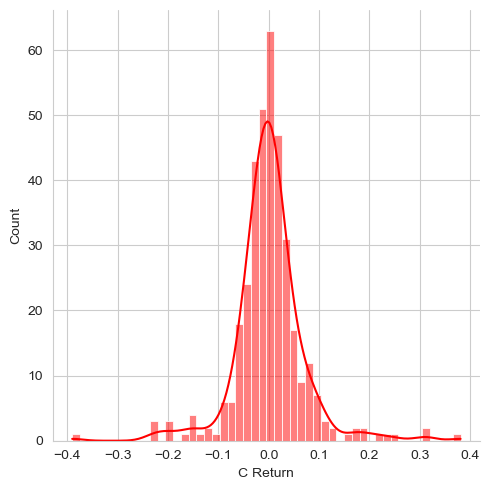

In [256]:
#plot of C Returns for the year 2008. NOTICE THE 10X INCREASE OF STANDARD DEVIATION
sns.displot(returns.iloc[730:1096]['C Return'],color = 'red', bins = 50, alpha = 0.5, kde = True)

C:\Users\bijit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


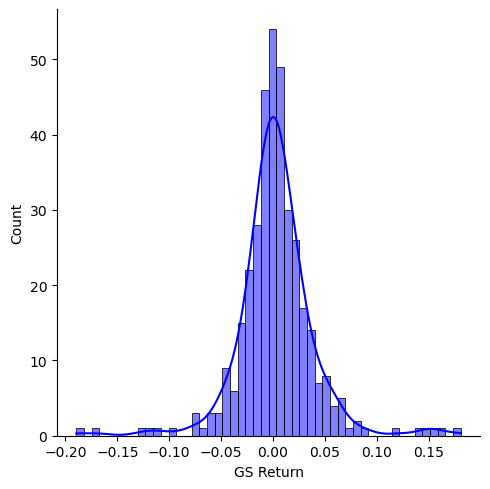

In [198]:

sns.displot(returns.iloc[730:1096]['GS Return'],color = 'blue', bins = 50, alpha = 0.5, kde = True)

C:\Users\bijit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


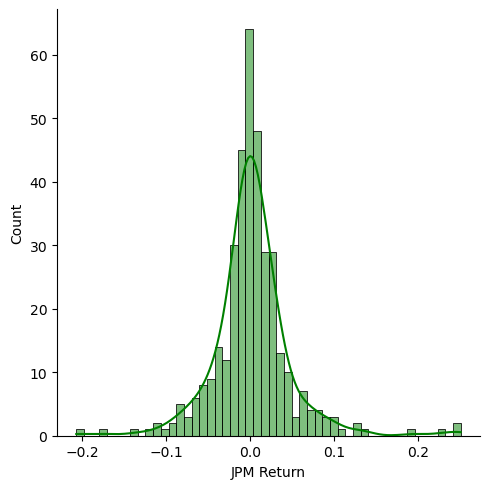

In [200]:
sns.displot(returns.iloc[730:1096]['JPM Return'],color = 'green', bins = 50, alpha = 0.5, kde = True)

In [202]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

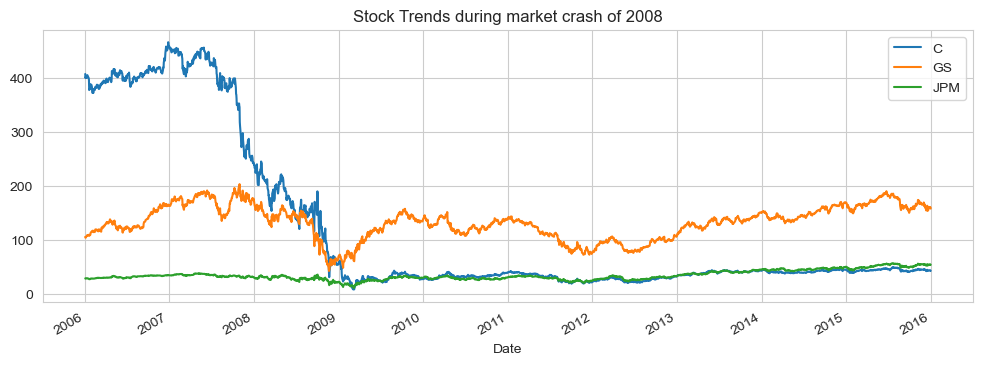

In [208]:
 for tick in tickers:
     bank_stocks[tick]['Close'].plot(figsize=(12,4),label=tick,title = 'Stock Trends during market crash of 2008')
 plt.legend()